# **Why Advanced LLMs, Such as GPT-4 or Claude, Fail in Critical Use Cases Despite Large Training Data**

# **Python Simulation: Bias-Variance Illustration**

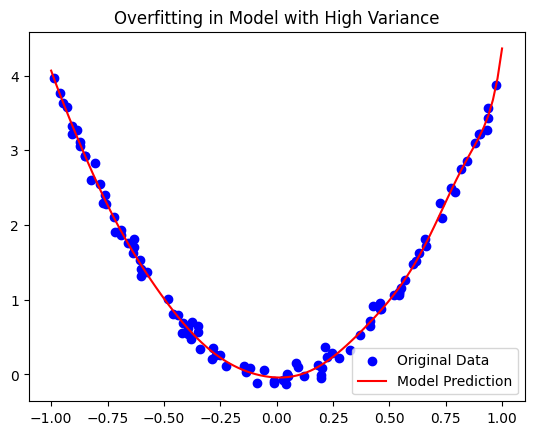

In [48]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Simulate data
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 random values for X between -1 and 1
X = np.random.rand(100, 1) * 2 - 1

# Define the relationship between X and y with some noise
# The relationship is a quadratic function plus some random noise
y = 4 * (X ** 2) + np.random.randn(100, 1) * 0.1

# Fit a polynomial model with a high degree (overfitting scenario)
# Create polynomial features up to degree 15
poly = PolynomialFeatures(degree=15)

# Transform X into polynomial features
X_poly = poly.fit_transform(X)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict on new, unseen data points
# Create a range of new X values from -1 to 1 for prediction
X_new = np.linspace(-1, 1, 100).reshape(-1, 1)

# Transform the new X values into polynomial features using the same degree
X_new_poly = poly.transform(X_new)

# Use the model to make predictions on the new polynomial-transformed data
y_pred = model.predict(X_new_poly)

# Plotting the overfitted model to visualize the results
import matplotlib.pyplot as plt
plt.scatter(X, y, color="blue", label="Original Data")  # Scatter plot of original data points
plt.plot(X_new, y_pred, color="red", label="Model Prediction")  # Plot of the model's prediction
plt.title("Overfitting in Model with High Variance")  # Title of the plot
plt.legend()  # Add a legend to distinguish between original data and prediction
plt.show()  # Display the plot


# **Python Simulation: Context Limitation**

In [47]:
# Import the necessary classes from the transformers library
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load the pre-trained GPT-2 tokenizer
# The tokenizer is responsible for converting text into token IDs that the model understands
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Load the pre-trained GPT-2 model with a language modeling head
# This model can generate text based on the input tokens
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define the input text that we want to generate additional text for
input_text = "In the 2008 financial crisis, market downturns created a massive loss of wealth. In 2023, the implications of the COVID-19 pandemic on global markets..."

# Encode the input text into token IDs that the model can process
# 'return_tensors' specifies that we want the output in PyTorch tensor format
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate text with the model based on the input IDs
# 'max_length' specifies the total length of the generated sequence (including the input text)
# 'do_sample=False' means we want to use greedy decoding, which selects the most probable word at each step
output = model.generate(input_ids, max_length=50, do_sample=False)

# Decode the output token IDs back into human-readable text, skipping special tokens
decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated text
print(decoded_output)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In the 2008 financial crisis, market downturns created a massive loss of wealth. In 2023, the implications of the COVID-19 pandemic on global markets...

The COVID-19 pandemic on global markets is a global pand


# **Python Simulation : Probabilistic Recommendations**

In [49]:
import numpy as np

# Define the probabilities of different case outcomes based on precedents
# Each key in the dictionary represents a potential case outcome, and the corresponding value is the probability of that outcome
case_prob = {
    "Plea Bargain": 0.4,     # Probability of a plea bargain
    "Guilty Verdict": 0.5,   # Probability of a guilty verdict
    "Mistrial": 0.1          # Probability of a mistrial
}

# Determine the outcome with the highest probability
# 'max' function is used to find the key with the maximum value (probability) in the dictionary
recommended_verdict = max(case_prob, key=case_prob.get)

# Print the recommended outcome based on the highest probability
print(f"Recommended outcome based on probability: {recommended_verdict}")


Recommended outcome based on probability: Guilty Verdict


# **Python Simulation : Correlation-Based Approach**

In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a simulated dataset with correlated variables (Ad Spend and Sales)
data = pd.DataFrame({
    "Ad_Spend": [100, 200, 300, 400, 500],  # Advertising spend in some currency unit
    "Sales": [20, 40, 50, 70, 80]           # Corresponding sales resulting from the Ad spend
})

# Define the feature (X) and target variable (y) for the model
X = data[["Ad_Spend"]]  # Independent variable (Advertising spend)
y = data["Sales"]       # Dependent variable (Sales)

# Train a simple linear regression model on the dataset
model = LinearRegression()
model.fit(X, y)  # Fit the model with the feature X and target y

# Predict the sales value based on a new Ad_Spend value of 600
predicted_sales = model.predict([[600]])

# Print the predicted sales value
print(f"Predicted Sales with 600 Ad Spend: {predicted_sales[0]}")


Predicted Sales with 600 Ad Spend: 96.99999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Python Simulation : OOD Handling**

In [41]:
from sklearn.ensemble import IsolationForest

# Simulated data: In-distribution vs. Out-of-distribution
in_distribution_data = np.random.normal(loc=0.0, scale=1.0, size=(100, 2))
out_of_distribution_data = np.array([[5, 5], [6, 6]])

# Train Isolation Forest for O

# Train Isolation Forest for OOD detection
model = IsolationForest(contamination=0.1)
model.fit(in_distribution_data)

# Predict on OOD data
out_of_distribution_predictions = model.predict(out_of_distribution_data)
print("OOD Predictions:", out_of_distribution_predictions)  # Output: -1 indicates OOD data detected


OOD Predictions: [-1 -1]


# **Python Simulation: Memory-Augmented Transformer**

In [51]:
import torch
import torch.nn as nn

# Pseudo-code: Memory-Augmented Transformer (MAT) Implementation
class MemoryAugmentedTransformer(nn.Module):
    def __init__(self, num_memory_slots, memory_size):
        super(MemoryAugmentedTransformer, self).__init__()

        # Initialize memory slots as learnable parameters
        # Memory slots are randomly initialized and will be learned during training
        self.memory_slots = nn.Parameter(torch.randn(num_memory_slots, memory_size))

        # Define a transformer encoder layer with specified memory size and number of attention heads
        # d_model specifies the size of each input sample's embedding, and nhead specifies the number of heads in multi-head attention
        encoder_layer = nn.TransformerEncoderLayer(d_model=memory_size, nhead=2)

        # Define a transformer encoder using a single layer (num_layers = 1)
        self.transformer_layer = nn.TransformerEncoder(encoder_layer, num_layers=1)

    def forward(self, input_seq):
        # Get the batch size from the input sequence
        batch_size = input_seq.size(0)

        # Expand memory slots to match the batch size, creating a batch of memory slots for each input in the batch
        expanded_memory = self.memory_slots.unsqueeze(0).expand(batch_size, -1, -1)

        # Concatenate the input sequence with the expanded memory slots along the sequence length dimension (dim=1)
        combined_input = torch.cat((input_seq, expanded_memory), dim=1)

        # Pass the combined input through the transformer encoder layer
        memory_attention = self.transformer_layer(combined_input)

        # Extract the output corresponding to the original input sequence (ignoring the additional memory slots)
        # Add the residual connection by summing the original input sequence and its corresponding portion from the output
        output = memory_attention[:, :input_seq.size(1), :] + input_seq

        # Return the final output
        return output

# Define model parameters: number of memory slots and the size of each memory slot
num_memory_slots = 5
memory_size = 16

# Instantiate the Memory-Augmented Transformer model with the defined parameters
model = MemoryAugmentedTransformer(num_memory_slots, memory_size)

# Create a dummy input tensor with a batch size of 2, sequence length of 10, and dimension size of 16
dummy_input = torch.randn(2, 10, memory_size)

# Forward pass through the model with the dummy input
output = model(dummy_input)

# Print the shape of the output tensor
print("Output shape:", output.shape)

# Print the output tensor itself
print("Output tensor:", output)


Output shape: torch.Size([2, 10, 16])
Output tensor: tensor([[[-0.5134, -1.3204,  2.0026,  1.8644,  2.1994, -0.1026,  0.2184,
          -3.6395, -0.8332, -5.2990,  1.8153,  0.9212,  1.8897, -1.9875,
          -2.1574,  0.9207],
         [-0.1486,  0.4330,  2.0126,  1.6046,  4.6734,  1.7789, -0.2217,
          -1.1356, -4.4048,  0.3735, -3.3480, -0.9884,  1.6117, -2.8732,
          -1.5148,  1.5979],
         [ 0.6033, -1.4135, -0.0306, -0.6155, -0.3413,  4.3548, -1.7567,
           2.9203,  1.6164, -0.3658,  0.7829, -1.7627, -2.7284,  4.5434,
          -1.7137,  1.1338],
         [ 5.9386,  0.6283, -2.2551,  1.2312,  0.4386, -1.6193,  0.9465,
           3.7462, -0.2976,  1.0546,  1.8179, -1.1354, -1.8394, -2.5244,
           0.6148, -0.0808],
         [-3.1206,  2.0451, -0.5166,  2.4413,  2.1556,  0.7509,  1.9937,
          -2.6525,  2.2427, -3.9914,  1.1749, -3.4193,  1.6977,  0.0950,
           1.8275,  0.6979],
         [ 2.0847,  0.1029, -0.8003,  3.5468, -4.4079,  1.2598, -2.4212,

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


# **Python Simulation: Simple RL Integration**

In [52]:
import numpy as np

# Define a simple Q-learning agent class
class SimpleQLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        # Initialize the Q-table as an empty dictionary
        self.q_table = {}
        # Learning rate (how quickly the agent updates its Q-values)
        self.alpha = alpha
        # Discount factor (how much the agent values future rewards)
        self.gamma = gamma
        # Epsilon (probability of choosing a random action for exploration)
        self.epsilon = epsilon

    def get_action(self, state, actions):
        # Choose an action based on an epsilon-greedy strategy
        if np.random.rand() < self.epsilon:
            # With probability epsilon, choose a random action (explore)
            return np.random.choice(actions)
        else:
            # Otherwise, choose the action with the highest Q-value (exploit)
            return max(actions, key=lambda a: self.q_table.get((state, a), 0))

    def update_q_value(self, state, action, reward, next_state, next_actions):
        # Get the current Q-value for the given state-action pair
        old_value = self.q_table.get((state, action), 0)
        # Estimate the maximum future reward from the next state
        future_reward = max([self.q_table.get((next_state, a), 0) for a in next_actions], default=0)
        # Update the Q-value using the Q-learning formula
        self.q_table[(state, action)] = old_value + self.alpha * (reward + self.gamma * future_reward - old_value)

# Initialize the agent with specified hyperparameters
agent = SimpleQLearningAgent(alpha=0.1, gamma=0.9, epsilon=0.1)

# Define the environment with states and actions
states = ["A", "B", "C"]
actions = ["Left", "Right"]

# Define the reward function as a dictionary mapping (state, action) pairs to (next state, reward)
rewards = {
    ("A", "Right"): ("B", 10),
    ("B", "Left"): ("A", 5),
    ("B", "Right"): ("C", 20),
    ("C", "Left"): ("B", 15)
}

# Simulate a learning process over multiple episodes
for episode in range(100):  # Simulate 100 episodes of learning
    current_state = "A"  # Start each episode from state "A"
    while current_state != "C":  # Keep going until we reach the terminal state "C"
        # Choose an action based on the current state using the agent's policy
        action = agent.get_action(current_state, actions)

        # Determine the next state and reward based on the chosen action
        if (current_state, action) in rewards:
            next_state, reward = rewards[(current_state, action)]
        else:
            next_state, reward = current_state, 0  # No change in state if the action is invalid

        # Update the Q-value for the chosen action using the agent's learning method
        agent.update_q_value(current_state, action, reward, next_state, actions)

        # Move to the next state
        current_state = next_state

# Print the learned Q-table after training
for state_action, value in agent.q_table.items():
    print(f"State-Action: {state_action}, Q-Value: {value:.2f}")


State-Action: ('A', 'Left'), Q-Value: 14.02
State-Action: ('A', 'Right'), Q-Value: 28.00
State-Action: ('B', 'Left'), Q-Value: 19.66
State-Action: ('B', 'Right'), Q-Value: 20.00


# **Python Simulation: Explainability with SHAP**

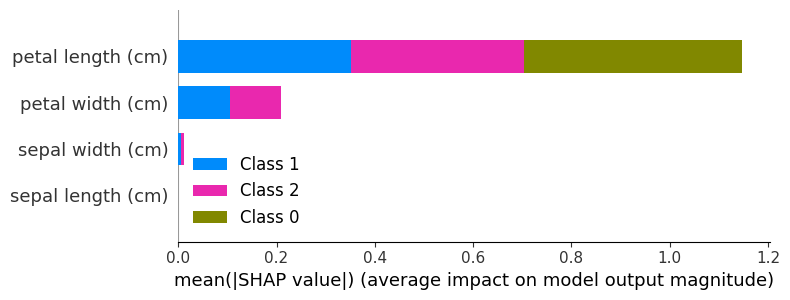

In [53]:
# Import necessary libraries
import shap
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset from sklearn
iris = load_iris()
# Separate the data (X) and target (y) into a pandas DataFrame
X, y = pd.DataFrame(iris.data, columns=iris.feature_names), iris.target

# Train a Decision Tree Classifier
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer object for the trained decision tree model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
# SHAP values measure the contribution of each feature to the model's predictions
shap_values = explainer.shap_values(X_test)

# Check if the shap_values are in a 3D array format (multi-class problem)
# For multi-class classification problems, shap_values will be a 3D array,
# so we need to convert it to a list of 2D arrays for compatibility with shap.summary_plot
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    shap_values = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# Display a summary plot of SHAP values
# plot_type="bar" provides a bar plot of mean absolute SHAP values for each feature
# Convert iris.feature_names to a simple Python list for display in the plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=list(iris.feature_names))
